In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_loan=pd.read_csv('loan.csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_loan.shape

(887379, 74)

In [6]:
pd.set_option('display.max_rows',74)
df_loan.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [7]:
df_loan.purpose

0                credit_card
1                        car
2             small_business
3                      other
4                      other
                 ...        
887374    debt_consolidation
887375      home_improvement
887376    debt_consolidation
887377    debt_consolidation
887378           credit_card
Name: purpose, Length: 887379, dtype: object

In [8]:
# Compulsory drop of ID type of Features
# 1) ID type features simply act as row identifiers when data get built into the database
# 2) ID can falsely become the best predictor when it ideally should not be a driving factor for the outcome
# dropping few other columns like url,zipcode,title etc that are not useful in analysis


df_loan=df_loan.drop(['id','member_id','url','title','zip_code','addr_state','desc','emp_title'],axis=1)

In [9]:
# Creating a Frequency Table in Pandas for each categorical
# dataframe['categorical feature'].value_counts() 
# --value_counts() function will show you which all values the categorical 
# feature will take and also how many observations are there for each of them

In [10]:
#Analyzing loan_status variable for getting a better understanding of the categories and the counts
df_loan['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [11]:
#Define dependent veriable


df_loan['target']=np.where(df_loan['loan_status'].isin(['Default','Charged Off','Does not meet the credit policy. Status:Charged Off']),1,0)

In [12]:
pd.set_option('display.max_rows',20)


In [13]:
# Drop the loan status variable from the independent variable list
df_loan=df_loan.drop(['loan_status'],axis=1)

In [14]:
# Calculate the default rate or event rate in the data
df_loan.target.mean()

# we can see the data is very imbalance as the even rate is 5% (risk events)
# However for Risk Modelling 5% is considered good, we generally model risk modelling data if it is less than 1%

0.053221904056778443

In [15]:
# Missing Value Analysis
pd.set_option('display.max_rows',75)
df_loan.isnull().mean()

# below data basically shows the percentage of data that is missing/null
#hence we need to remove those columns from analysis

loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_length                     0.050514
home_ownership                 0.000000
annual_inc                     0.000005
verification_status            0.000000
issue_d                        0.000000
pymnt_plan                     0.000000
purpose                        0.000000
dti                            0.000000
delinq_2yrs                    0.000033
earliest_cr_line               0.000033
inq_last_6mths                 0.000033
mths_since_last_delinq         0.511971
mths_since_last_record         0.845553
open_acc                       0.000033
pub_rec                        0.000033
revol_bal                      0.000000
revol_util                     0.000566


In [16]:
# Selecting all rows and only those columns where the missing value percentage is <=25%

data=df_loan.loc[:,df_loan.isnull().mean()<=0.25]

In [17]:
data.shape

(887379, 45)

In [18]:
# Creating a dataset with only dependent and independent

Y=data[['target']]
X=data.drop(['target'],axis=1)

In [19]:
X.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
pymnt_plan                     object
purpose                        object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status            object
out_prncp                     float64
out_prncp_in

In [20]:
# since the x variables has both object and float types, we will separate the

char=X.select_dtypes(include='object')
num=X.select_dtypes(include='number')


In [21]:
char.shape

(887379, 14)

In [22]:
num.shape

(887379, 30)

In [23]:
# we will create a function to remove the outliers by capping the values below 1 percentile and above 99 percentile
# for all the numberical column

def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [24]:
num=num.apply(lambda x:outlier_cap(x))

In [25]:
num.isnull().mean()

# we can see that all these columns have missing values less than 80%
# and now we will impute all the missing values

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
int_rate                      0.000000
installment                   0.000000
annual_inc                    0.000005
dti                           0.000000
delinq_2yrs                   0.000033
inq_last_6mths                0.000033
open_acc                      0.000033
pub_rec                       0.000033
revol_bal                     0.000000
revol_util                    0.000566
total_acc                     0.000033
out_prncp                     0.000000
out_prncp_inv                 0.000000
total_pymnt                   0.000000
total_pymnt_inv               0.000000
total_rec_prncp               0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
collection_recovery_fee       0.000000
last_pymnt_amnt               0.000000
collections_12_mths_ex_med    0.000163
policy_code              

#### Imputing Missing Values with Mean for Numberical variables

In [26]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
#defining what missing values are and using mean to impute as we have already take care of outliers.
num1=pd.DataFrame(imputer.fit_transform(num),index=num.index,columns=num.columns)

In [27]:
num1.isnull().mean()

loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
int_rate                      0.0
installment                   0.0
annual_inc                    0.0
dti                           0.0
delinq_2yrs                   0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util                    0.0
total_acc                     0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_pymnt                   0.0
total_pymnt_inv               0.0
total_rec_prncp               0.0
total_rec_int                 0.0
total_rec_late_fee            0.0
recoveries                    0.0
collection_recovery_fee       0.0
last_pymnt_amnt               0.0
collections_12_mths_ex_med    0.0
policy_code                   0.0
acc_now_delinq                0.0
tot_coll_amt                  0.0
tot_cur_bal                   0.0
total_rev_hi_l

#### Imputing Missing Values with Mode for Categorical Variables

In [28]:
char.isnull().mean()

term                   0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             0.050514
home_ownership         0.000000
verification_status    0.000000
issue_d                0.000000
pymnt_plan             0.000000
purpose                0.000000
earliest_cr_line       0.000033
initial_list_status    0.000000
last_pymnt_d           0.019900
last_credit_pull_d     0.000060
application_type       0.000000
dtype: float64

In [29]:
from sklearn.impute import SimpleImputer
charimputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
char1=pd.DataFrame(charimputer.fit_transform(char),index=char.index,columns=char.columns)

In [30]:
char1.isnull().mean()

term                   0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
verification_status    0.0
issue_d                0.0
pymnt_plan             0.0
purpose                0.0
earliest_cr_line       0.0
initial_list_status    0.0
last_pymnt_d           0.0
last_credit_pull_d     0.0
application_type       0.0
dtype: float64

In [31]:
# To avoid discrimation an enable fair lending, we are not using any title variables are risk identifier factors

char1=char1.drop(['issue_d','sub_grade','last_credit_pull_d','earliest_cr_line','last_pymnt_d'],axis=1)

In [32]:
# Joining back the target  variable and exporting the pivot table for a BiVariate Analysis
#categorical_variable_chk=pd.concat([Y,char_1],axis=1,join='inner')
#categorical_variable_chk.to_csv('categorical_data_chk.csv')

In [33]:
# Bivariate analysis will be done on both categorical and numberical features
# but for numercial features since the data is continuous , we need to convert them into discrete form.

#Every feature will be converted into a rank from 0 to 9 (0 being the lowest and 9 being highest)
#This basically shows at which percentile(i.e. deciles) does the data stand for that feature 

#using bivariate analysis we can access the impact/effect of ranks/features values on the event rate

# for eg:
num1['loan_amnt'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

# this means ppl getting 5000 and less loan would go to rank 0
# mean ppl getting 5000 to 7175 loan would go to rank 1
# and ppl with 28000 and above will go to rank 9

count    887379.000000
mean      14759.987672
std        8428.021535
min        1800.000000
10%        5000.000000
20%        7175.000000
30%        9600.000000
40%       11000.000000
50%       13000.000000
60%       15000.000000
70%       18450.000000
80%       21600.000000
90%       28000.000000
max       35000.000000
Name: loan_amnt, dtype: float64


#### Discretizing the numerical features    

In [34]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num1),index=num1.index,columns=num1.columns).add_suffix('_Rank')
num_binned.head()

,loan_amnt_Rank,funded_amnt_Rank,funded_amnt_inv_Rank,int_rate_Rank,installment_Rank,annual_inc_Rank,dti_Rank,delinq_2yrs_Rank,inq_last_6mths_Rank,open_acc_Rank,pub_rec_Rank,revol_bal_Rank,revol_util_Rank,total_acc_Rank,out_prncp_Rank,out_prncp_inv_Rank,total_pymnt_Rank,total_pymnt_inv_Rank,total_rec_prncp_Rank,total_rec_int_Rank,total_rec_late_fee_Rank,recoveries_Rank,collection_recovery_fee_Rank,last_pymnt_amnt_Rank,collections_12_mths_ex_med_Rank,policy_code_Rank,acc_now_delinq_Rank,tot_coll_amt_Rank,tot_cur_bal_Rank,total_rev_hi_lim_Rank
0,1.0,1.0,0.0,2.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,5.0,8.0,0.0,0.0,0.0,5.0,5.0,6.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,6.0,6.0
1,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,6.0
2,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,2.0,6.0,6.0
3,3.0,3.0,3.0,5.0,4.0,2.0,6.0,0.0,1.0,4.0,0.0,2.0,0.0,8.0,0.0,0.0,7.0,7.0,8.0,7.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,6.0,6.0
4,0.0,0.0,0.0,4.0,0.0,6.0,5.0,0.0,0.0,8.0,0.0,8.0,4.0,8.0,0.0,0.0,3.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,6.0


#### Understanding the predictive power of Numberical features

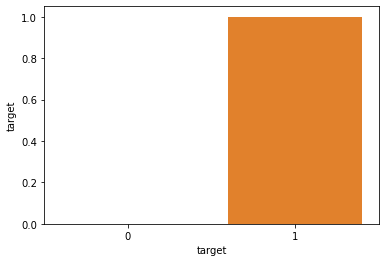

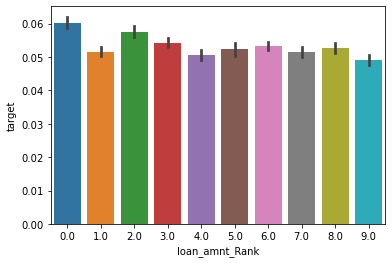

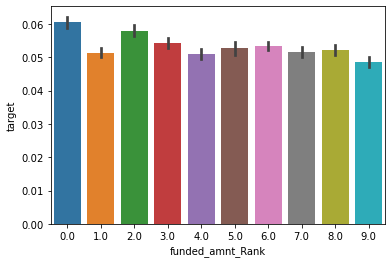

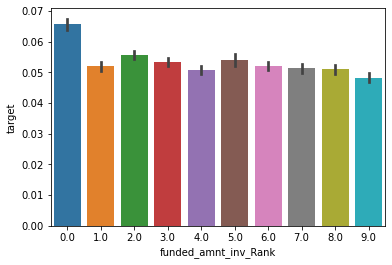

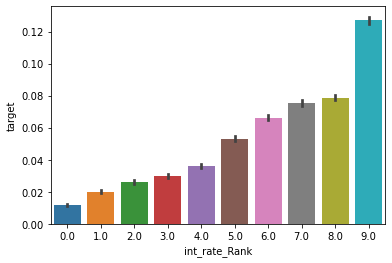

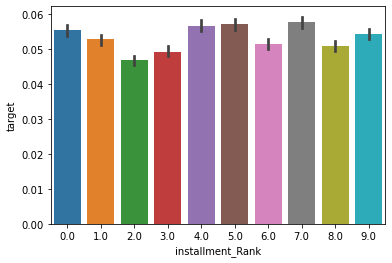

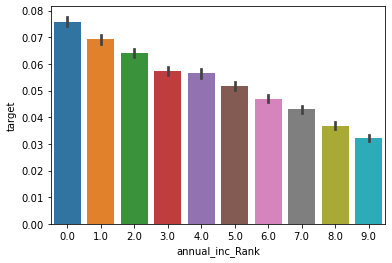

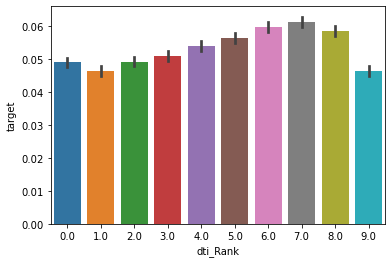

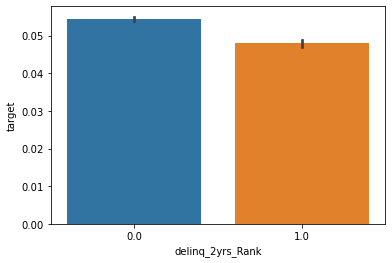

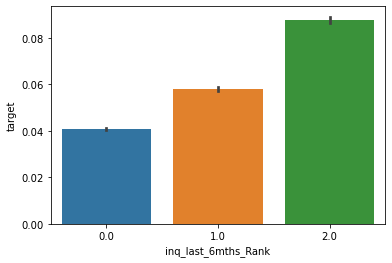

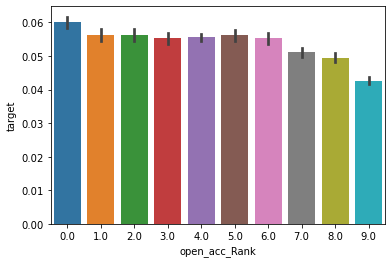

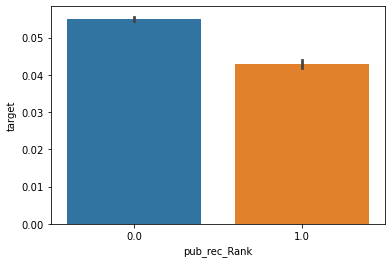

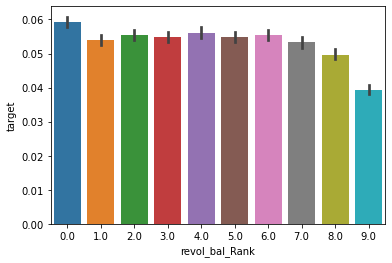

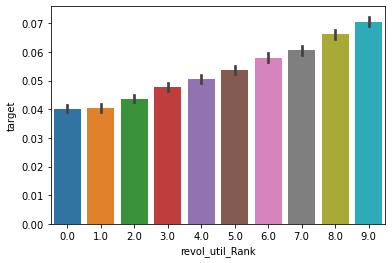

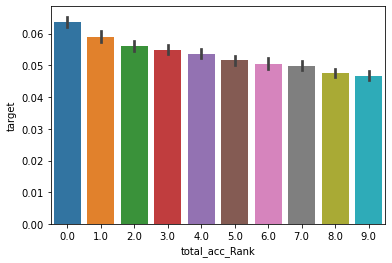

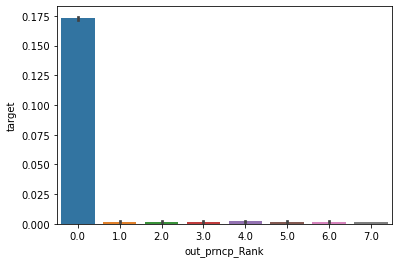

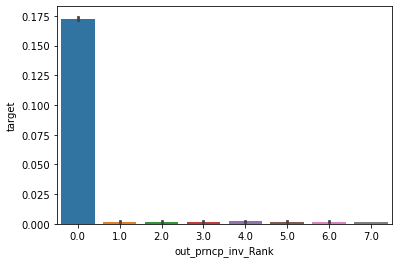

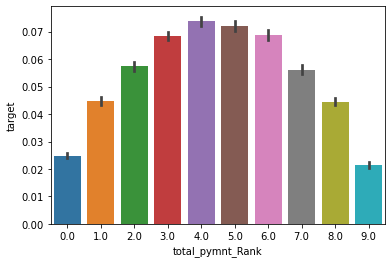

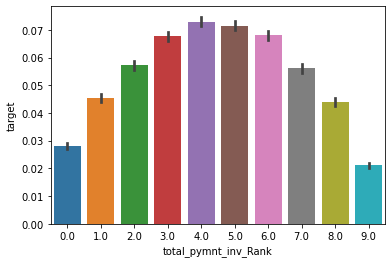

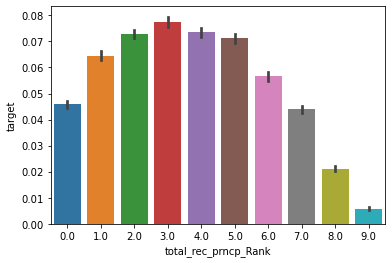

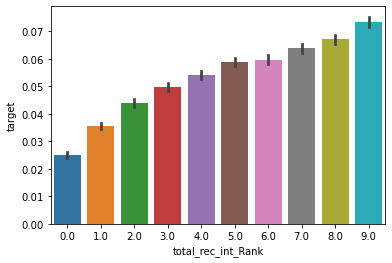

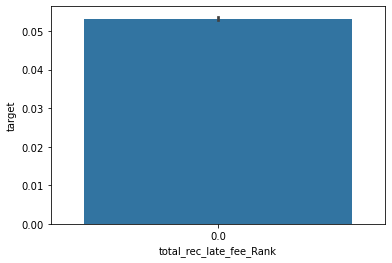

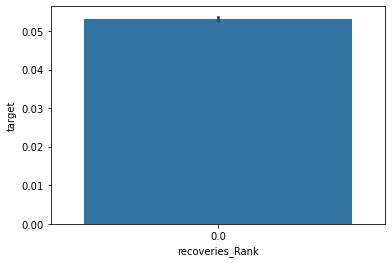

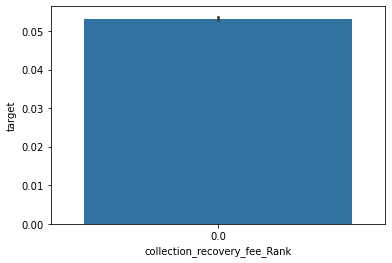

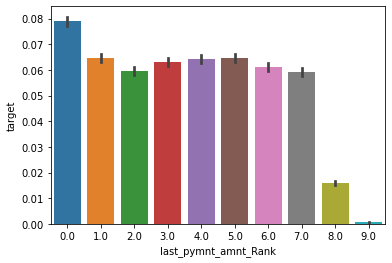

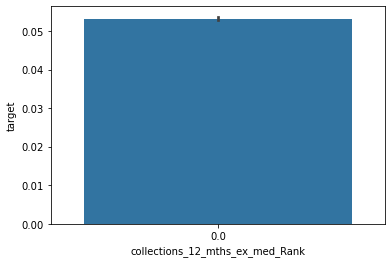

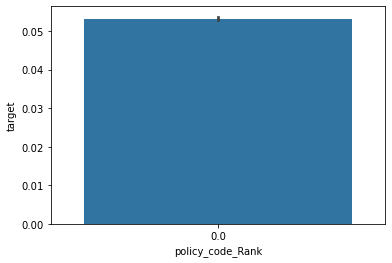

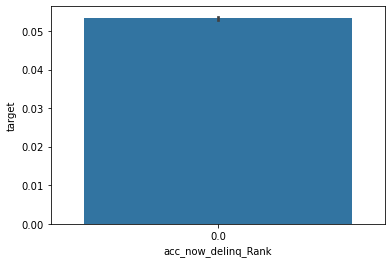

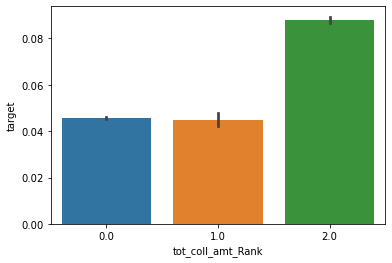

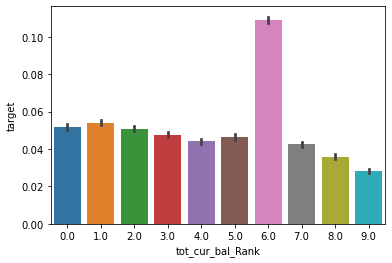

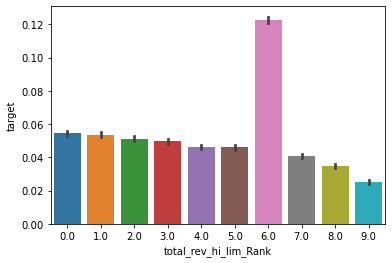

In [35]:

#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

#percentage_income_goesinto_intallments=Insallment/annual_inc (Derived Variables/Feature Engineering)


X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean

for col in (X_bin_combined.columns):
    plt.figure()
    sns.barplot(x=col,y='target',data=X_bin_combined,estimator=mean)
plt.show()

# from the below graph we can understand which features are important, using the slope.
# the graph with more slope show a better predictive power

# the graph basically shows how much each decile differently affect the target, if each decile for a feature
# differently effect the target then it's a good predictor. 
# however a graph with slope basically shows wether value is high or low, it's not affecting target hence bad predictor

In [36]:
num1.shape

(887379, 30)

In [37]:
# now  we could either manually select important features from above and then feed it to a feature selection model 
# and find best features, or we could directly input all the features in the selection model.
# here we can decide the number of features and the model further filters the features to give us the best k features

# Select K best for Numberical Features

from sklearn.feature_selection import SelectKBest,chi2
selector=SelectKBest(chi2,k=15)
X_new=selector.fit_transform(num1,Y)

# Get columns to keep and create new dataframe with those only
cols=selector.get_support(indices=True)  
# get selected column indexes in a list which can bve used to create a dataframe using iloc
select_features_df_num=num1.iloc[:,cols]

In [38]:
select_features_df_num[:5]

,funded_amnt_inv,annual_inc,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,4975.0,24000.0,13648.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,171.62,132.053983,137182.970736,31274.143259
1,2500.0,30000.0,1687.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,117.08,1.11,119.66,132.053983,137182.970736,31274.143259
2,2400.0,19000.0,2956.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,649.91,132.053983,137182.970736,31274.143259
3,10000.0,49200.0,5598.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,0.00,0.00,357.48,132.053983,137182.970736,31274.143259
4,3000.0,80000.0,27783.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,67.79,132.053983,137182.970736,31274.143259


In [39]:
select_features_df_num.dtypes

# we could double check the features selected from the bar plot above to check its slope


funded_amnt_inv            float64
annual_inc                 float64
revol_bal                  float64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int              float64
recoveries                 float64
collection_recovery_fee    float64
last_pymnt_amnt            float64
tot_coll_amt               float64
tot_cur_bal                float64
total_rev_hi_lim           float64
dtype: object

#### Understanding the predictive power of Categorical features

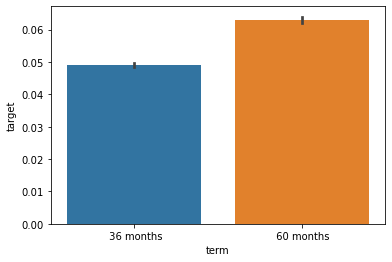

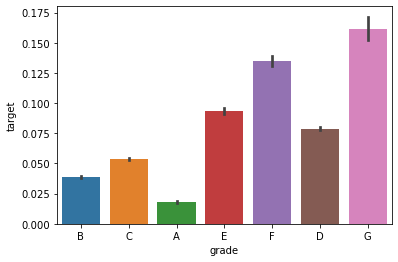

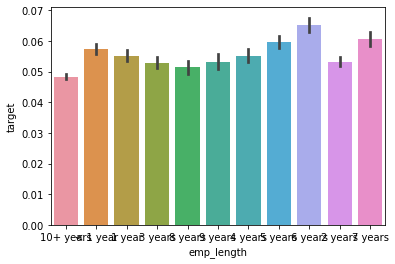

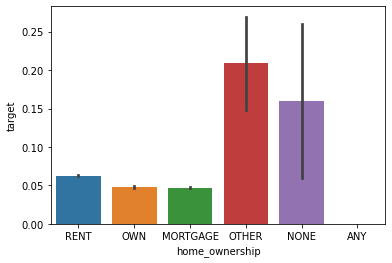

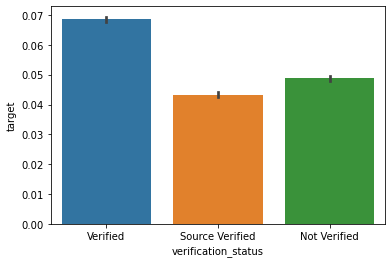

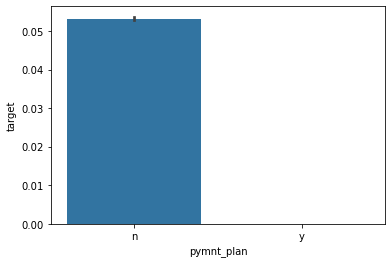

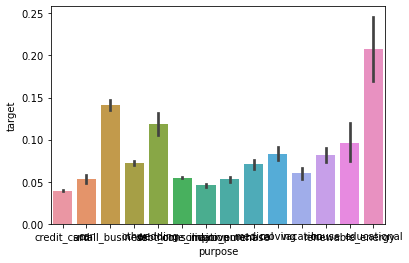

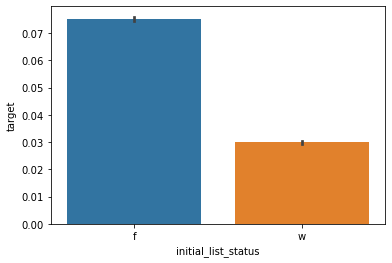

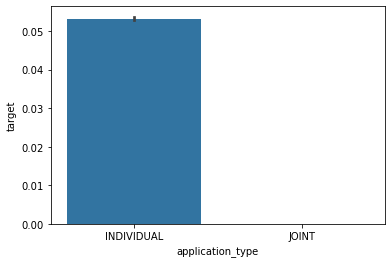

In [40]:

X_char_combined=pd.concat([Y,char1],axis=1,join='inner')


import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean

for col in (char1.columns):
    plt.figure()
    sns.barplot(x=col,y="target",data=X_char_combined,estimator=mean)
plt.show()

In [41]:

char1.shape

(887379, 9)

In [42]:
char1.purpose.value_counts()

debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42894
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

In [43]:
char1.term.value_counts()

 36 months    621125
 60 months    266254
Name: term, dtype: int64

In [44]:
# Steps to regroup categorical features in order to achieve linear discrimination
# These levels to group have been discovered through the pivot analysis

char1['purpose_1']=np.where(char1['purpose'].isin(['other','medical','vacation','debt_consolidation','car','major_purchase','home_improvement','credit_card']),'others',char1['purpose'])
#grouping the selected attributes as others while keeping the rest as the same as in the feature purpose

char1['verified_1']=np.where(char1['verification_status'].isin(['Source Verified','Verified']),'Verified',char1['verification_status'])
#grouping selected attributes as verified while rest as the same as in ver status column

char1['home_own_1']=np.where(char1['home_ownership'].isin(['OWN','MORGAGE']),'OWN',
                    np.where(char1['home_ownership'].isin(['RENT']),'RENT','OTHER'))
# grouping as OWN and morgage together as own and rent and RENT while grouping everything else as other

char1['term_1']=np.where(char1['term'].isin(['60 months']),'60','30')

In [45]:
char1.home_own_1.value_counts()

OTHER    443792
RENT     356117
OWN       87470
Name: home_own_1, dtype: int64

In [46]:
#creating a new df with selected columns

char2=char1.loc[:,['purpose_1','verified_1','home_own_1','term_1','grade','emp_length','pymnt_plan','application_type']]

In [47]:
char2[:5]

,purpose_1,verified_1,home_own_1,term_1,grade,emp_length,pymnt_plan,application_type
0,others,Verified,RENT,30,B,10+ years,n,INDIVIDUAL
1,others,Verified,RENT,30,C,< 1 year,n,INDIVIDUAL
2,small_business,Not Verified,RENT,30,C,10+ years,n,INDIVIDUAL
3,others,Verified,RENT,30,C,10+ years,n,INDIVIDUAL
4,others,Verified,RENT,30,B,1 year,n,INDIVIDUAL


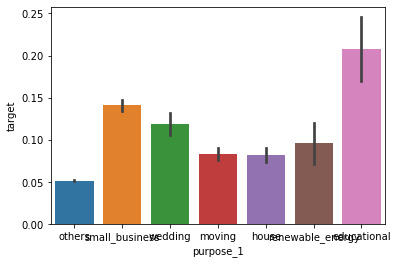

In [48]:
#checking the new grouped purpose column for effect on target
check=pd.concat([Y,char2],axis=1,join='inner')
ax=sns.barplot(x='purpose_1',y='target',data=check,estimator=mean)

# we have grouped the baseline categories as others and we can see that the risk factor in the baseline categories is
# very low(i.e 5%) as compared to the other categories

In [49]:
# create dummy features with n-1 levels
X_char_dummy=pd.get_dummies(char2,drop_first=True) 

# we're creating n-1 level and dropping first level because one level of our categorical feature becomes 
# the reference group during dummy encoding for regression and is redundant.
# i.e. nth level is derived from rest of te dummies

In [50]:
X_char_dummy.shape

(887379, 27)

In [51]:
# Select K Best for Categorical Features

from sklearn.feature_selection import SelectKBest, chi2
selector=SelectKBest(chi2,k=25)
X_new1=selector.fit_transform(X_char_dummy,Y)

# Get columns to keep and create new dataframe with those only
cols=selector.get_support(indices=True)
selected_features_df_char=(X_char_dummy.iloc[:,cols])


In [52]:
selected_features_df_char.dtypes

purpose_1_house               uint8
purpose_1_moving              uint8
purpose_1_others              uint8
purpose_1_renewable_energy    uint8
purpose_1_small_business      uint8
purpose_1_wedding             uint8
verified_1_Verified           uint8
home_own_1_OWN                uint8
home_own_1_RENT               uint8
grade_B                       uint8
grade_C                       uint8
grade_D                       uint8
grade_E                       uint8
grade_F                       uint8
grade_G                       uint8
emp_length_10+ years          uint8
emp_length_3 years            uint8
emp_length_4 years            uint8
emp_length_5 years            uint8
emp_length_6 years            uint8
emp_length_7 years            uint8
emp_length_8 years            uint8
emp_length_< 1 year           uint8
pymnt_plan_y                  uint8
application_type_JOINT        uint8
dtype: object

In [53]:
selected_features_df_char[:5]

,purpose_1_house,purpose_1_moving,purpose_1_others,purpose_1_renewable_energy,purpose_1_small_business,purpose_1_wedding,verified_1_Verified,home_own_1_OWN,home_own_1_RENT,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_< 1 year,pymnt_plan_y,application_type_JOINT
0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
# before combining the features we noticed that the K best algo for numerical features has not selected 2 very good
# predictors: interest rate and enquiry in the past 6 months, may be due to some statistical insignificance,
# But form the barplot of numerical features, we find these two features have very good slope hence we will be adding
# these two features in a seperate data frame and then combined it together in Xall

num_additional=num1.loc[:,['int_rate','inq_last_6mths']]

In [55]:
num_additional[:4]

,int_rate,inq_last_6mths
0,10.65,1.0
1,15.27,4.0
2,15.96,2.0
3,13.49,1.0


In [56]:
# Bringing all X together

X_all=pd.concat([select_features_df_num,selected_features_df_char,num_additional],axis=1,join='inner')

In [57]:
X_all.head()

,funded_amnt_inv,annual_inc,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,purpose_1_house,purpose_1_moving,purpose_1_others,purpose_1_renewable_energy,purpose_1_small_business,purpose_1_wedding,verified_1_Verified,home_own_1_OWN,home_own_1_RENT,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_< 1 year,pymnt_plan_y,application_type_JOINT,int_rate,inq_last_6mths
0,4975.0,24000.0,13648.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,171.62,132.053983,137182.970736,31274.143259,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,10.65,1.0
1,2500.0,30000.0,1687.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,117.08,1.11,119.66,132.053983,137182.970736,31274.143259,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,15.27,4.0
2,2400.0,19000.0,2956.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,649.91,132.053983,137182.970736,31274.143259,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,15.96,2.0
3,10000.0,49200.0,5598.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,0.00,0.00,357.48,132.053983,137182.970736,31274.143259,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,13.49,1.0
4,3000.0,80000.0,27783.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,67.79,132.053983,137182.970736,31274.143259,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.69,0.0


In [58]:
Y.target.value_counts()

0    840151
1     47228
Name: target, dtype: int64

In [59]:
#event rate is 5%
Y.mean()

target    0.053222
dtype: float64

In [60]:
# Splitting Data into Train and test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_all,Y,test_size=0.3,random_state=42)

In [61]:
#now we'll check if the train test split mainitains the original event rate (central tendency)
y_train.mean()


target    0.053195
dtype: float64

In [62]:
y_test.mean()

target    0.053284
dtype: float64

In [63]:
# hence we can see that the event rate for both test and train is 5% which matches original data.
# if we had seen the discrepancy, we could have changed the random state until we match the event rate of original data

In [64]:
# testing one of the columns to see if train and test are randomnly sampled and matches X_all

In [65]:
X_train['revol_bal'].describe()

count    621165.000000
mean      16213.795386
std       15199.432137
min         309.000000
25%        6440.000000
50%       11872.000000
75%       20813.000000
max       93410.660000
Name: revol_bal, dtype: float64

In [66]:
X_test['revol_bal'].describe()

count    266214.000000
mean      16220.211949
std       15176.915439
min         309.000000
25%        6452.000000
50%       11881.000000
75%       20872.000000
max       93410.660000
Name: revol_bal, dtype: float64

In [67]:
X_all['revol_bal'].describe()

count    887379.000000
mean      16215.720357
std       15192.672358
min         309.000000
25%        6443.000000
50%       11875.000000
75%       20829.000000
max       93410.660000
Name: revol_bal, dtype: float64

In [68]:
# we can see that the mean,min max are similar in test and train like x_all, hence data is randomly sampled

In [69]:
# Non Linearity in feature relationships are observed which makes tree methods a good choice
# There are few options to consider among tree methods
# White Box (Completely Explainable Set of Rules) - Decision Tree
# Ensemble Methods - Random Forest (With Bagging)
# Ensemble Methods - GBM/XGBoost (Boosting)

In [70]:
# building a decision tree model

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=0,max_depth=4)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [71]:
#plotting decision tree

# from sklearn import tree 
# import pydotplus
# import matplotlib.pyplot as plt
# plt.figure(figsize=[50,10])
# tree.plot_tree(dtree,filled=True,fontsize=20,rounded=True,feature_names=X_all.columns)
# plt.show()

In [72]:
# Building a Random Forest Model

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0,max_depth=4)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [73]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
recoveries,3.544420e-01
collection_recovery_fee,2.624615e-01
out_prncp_inv,1.343861e-01
out_prncp,6.966667e-02
total_rec_prncp,5.937880e-02
last_pymnt_amnt,4.292319e-02
total_pymnt,1.903916e-02
int_rate,1.567425e-02
funded_amnt_inv,1.233991e-02
total_pymnt_inv,1.125969e-02


In [74]:
# Building a Gradient Boosting Model

from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(random_state=0,max_depth=4)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=4, random_state=0)

In [75]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
recoveries,5.459012e-01
funded_amnt_inv,1.954975e-01
total_rec_prncp,1.701200e-01
last_pymnt_amnt,3.228122e-02
out_prncp,3.219953e-02
out_prncp_inv,1.369461e-02
tot_coll_amt,6.214114e-03
total_pymnt_inv,2.173182e-03
total_rec_int,1.328120e-03
total_pymnt,1.794287e-04


In [76]:
# building XGBoost

from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=0,max_depth=4)
xgb.fit(X_train,y_train)

ValueError: feature_names must be string, and may not contain [, ] or <

In [ ]:
X_train.dtypes

In [92]:
# Xgboost does not take column same which have'[',']', or '<' symbols in the column name,
# hence we need to rename those column before using xgbm
# we notice that there is a column name 'emp_length_< 1 year' which uses < sign, we could rename it manually or use regex

# we will use the generic method of regex to chnage the column names

import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) 
                   else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) 
                   else col for col in X_train.columns.values]

X_all.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) 
                   else col for col in X_train.columns.values]
# replace the selected symbols with "_"

In [ ]:
X_train.dtypes

In [93]:
# running XGBoost again

from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=0,max_depth=4)
xgb.fit(X_train,y_train)

[22:26:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
# model evaluation

y_pred_dtree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)
y_pred_xgb=xgb.predict(X_test)

#predict function will show 1(i.e. risk) only if predicted probability reaches 50%, below that it will 0

In [95]:
# confusion Matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [96]:
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred_dtree))
print('Precision: ',metrics.precision_score(y_test,y_pred_dtree))
print('Recall: ',metrics.recall_score(y_test,y_pred_dtree))
print('F1-Score: ',metrics.f1_score(y_test,y_pred_dtree))

Accuracy:  0.9885543209598293
Precision:  0.9939684229199929
Recall:  0.7899894254494184
F1-Score:  0.8803173730311482


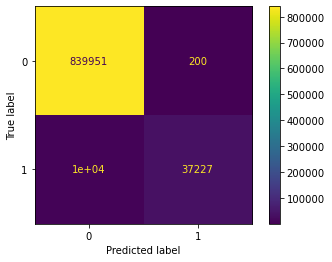

In [97]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [98]:
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred_rf))
print('Precision: ',metrics.precision_score(y_test,y_pred_rf))
print('Recall: ',metrics.recall_score(y_test,y_pred_rf))
print('F1-Score: ',metrics.f1_score(y_test,y_pred_rf))

Accuracy:  0.9747195864980804
Precision:  1.0
Recall:  0.525555163905534
F1-Score:  0.6890018484288355


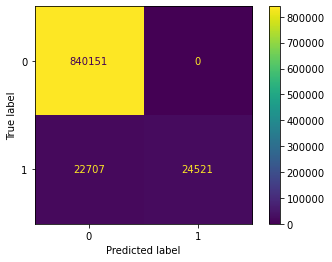

In [99]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [100]:
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred_gbm))
print('Precision: ',metrics.precision_score(y_test,y_pred_gbm))
print('Recall: ',metrics.recall_score(y_test,y_pred_gbm))
print('F1-Score: ',metrics.f1_score(y_test,y_pred_gbm))

Accuracy:  0.9973479982269903
Precision:  0.9983731420542779
Recall:  0.9517800493479027
F1-Score:  0.9745199942254944


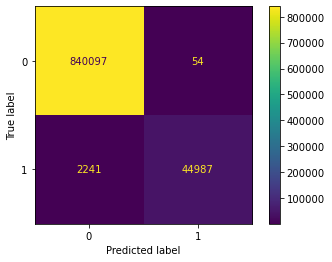

In [101]:
metrics.plot_confusion_matrix(gbm,X_all,Y)

In [102]:
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred_xgb))
print('Precision: ',metrics.precision_score(y_test,y_pred_xgb))
print('Recall: ',metrics.recall_score(y_test,y_pred_xgb))
print('F1-Score: ',metrics.f1_score(y_test,y_pred_xgb))

Accuracy:  0.9981556191635301
Precision:  0.999416484318016
Recall:  0.9659499471272471
F1-Score:  0.9823982792615165


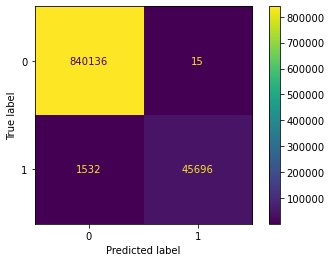

In [103]:
metrics.plot_confusion_matrix(xgb,X_all,Y)

In [ ]:
# Probabililty coming from xgbm model has higher discrimination power 
# than the probailities coming from decision tree and random forest model

# basically the predict function shows that probability of 1532 were less than 50% hence classified as 0

In [ ]:
# Lorentz Curve

#in lorentz curve we create groups/ranks/deciles of all probabilities and we will make 10 ranks/groups
#Value =10 means the top 10 values that have highest probabilities(of risk) 
# We will use these rank to identify the groups with highest and lowest probabilities and will make strategies based on
# these groups

In [85]:
# Lorentz curve for decision tree

y_pred_prob=dtree.predict_proba(X_all)[:,1]   #predict probability
#returns two columns, where first column is(non event) for not risky and 2nd column is the actual event,
# hence we  take only 2nd column
df_loan['y_pred_P']=pd.DataFrame(y_pred_prob)  # adding a y_pred column to the original df along side actual Y
df_loan['P_Rank_RF']=pd.qcut(df_loan['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
#grouping the predicted probability in deciles (1 to 10)

rank_df=df_loan.groupby('P_Rank_RF')['target'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
#creating new columns for count and mean and adding in a new df. Count shows the number of rows/records in each decide.
# mean shows the event rate

sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False) #sorting & creating new df based on Rank in desc order

# Adding some new columns
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']  #column to show number of event in each decile
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum() #cumulative sum of all events

sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())  # each event/total event
# above column shows how many percentage of event does the decile account for
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum() # cumulative event rate

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum()) #records % per decile(10% each)
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum() # cumulative of the above column (adds up to100%)

sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1  # decile number
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

# So we need to compare till the 3rd decide of cum_event_cap from the multiple ML algo. the algorithm which accounts
# for maximum events within first 3 deciles are considered the best

# For the dtree it is 0.9823

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,88738,0.506998,44990.0,44990.0,0.952613,0.952613,0.100000,0.100000,1,9.526118
1,9,88738,0.013106,1163.0,46153.0,0.024625,0.977238,0.100000,0.200000,2,4.886185
2,8,88738,0.002738,243.0,46396.0,0.005145,0.982383,0.100000,0.300000,3,3.274607
3,7,88738,0.002558,227.0,46623.0,0.004806,0.987190,0.100000,0.400000,4,2.467972
4,6,88737,0.001657,147.0,46770.0,0.003113,0.990302,0.099999,0.499999,5,1.980607
5,5,88738,0.001792,159.0,46929.0,0.003367,0.993669,0.100000,0.600000,6,1.656116
6,4,88738,0.001386,123.0,47052.0,0.002604,0.996273,0.100000,0.700000,7,1.423248
7,3,88738,0.000868,77.0,47129.0,0.001630,0.997904,0.100000,0.800000,8,1.247380
8,2,88738,0.000124,11.0,47140.0,0.000233,0.998137,0.100000,0.900000,9,1.109041
9,1,88738,0.000992,88.0,47228.0,0.001863,1.000000,0.100000,1.000000,10,1.000000


In [86]:
# Lorentz curve for random forest

y_pred_prob=rf.predict_proba(X_all)[:,1]   #predict probability
#returns two columns, where first column is(non event) for not risky and 2nd column is the actual event,
# hence we  take only 2nd column
df_loan['y_pred_P']=pd.DataFrame(y_pred_prob)  # adding a y_pred column to the original df along side actual Y
df_loan['P_Rank_RF']=pd.qcut(df_loan['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
#grouping the predicted probability in deciles (1 to 10)

rank_df=df_loan.groupby('P_Rank_RF')['target'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
#creating new columns for count and mean and adding in a new df. Count shows the number of rows/records in each decide.
# mean shows the event rate

sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False) #sorting & creating new df based on Rank in desc order

# Adding some new columns
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']  #column to show number of event in each decile
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum() #cumulative sum of all events

sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())  # each event/total event
# above column shows how many percentage of event does the decile account for
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum() # cumulative event rate

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum()) #records % per decile(10% each)
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum() # cumulative of the above column (adds up to100%)

sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1  # decile number
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

# for random forest till the 3rd decile account for 0.9756 which is worse than dtree

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,88738,0.511156,45359.0,45359.0,0.960426,0.960426,0.100000,0.100000,1,9.604249
1,9,88738,0.007043,625.0,45984.0,0.013234,0.973660,0.100000,0.200000,2,4.868293
2,8,88738,0.001059,94.0,46078.0,0.001990,0.975650,0.100000,0.300000,3,3.252163
3,7,88738,0.004091,363.0,46441.0,0.007686,0.983336,0.100000,0.400000,4,2.458338
4,6,88737,0.003122,277.0,46718.0,0.005865,0.989201,0.099999,0.499999,5,1.978405
5,5,88738,0.001961,174.0,46892.0,0.003684,0.992886,0.100000,0.600000,6,1.654811
6,4,88738,0.001690,150.0,47042.0,0.003176,0.996062,0.100000,0.700000,7,1.422946
7,3,88738,0.000958,85.0,47127.0,0.001800,0.997861,0.100000,0.800000,8,1.247327
8,2,88738,0.000586,52.0,47179.0,0.001101,0.998962,0.100000,0.900000,9,1.109958
9,1,88738,0.000552,49.0,47228.0,0.001038,1.000000,0.100000,1.000000,10,1.000000


In [87]:
# Lorentz curve for gradient boost

y_pred_prob=gbm.predict_proba(X_all)[:,1]   #predict probability
#returns two columns, where first column is(non event) for not risky and 2nd column is the actual event,
# hence we  take only 2nd column
df_loan['y_pred_P']=pd.DataFrame(y_pred_prob)  # adding a y_pred column to the original df along side actual Y
df_loan['P_Rank_RF']=pd.qcut(df_loan['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
#grouping the predicted probability in deciles (1 to 10)

rank_df=df_loan.groupby('P_Rank_RF')['target'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
#creating new columns for count and mean and adding in a new df. Count shows the number of rows/records in each decide.
# mean shows the event rate

sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False) #sorting & creating new df based on Rank in desc order

# Adding some new columns
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']  #column to show number of event in each decile
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum() #cumulative sum of all events

sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())  # each event/total event
# above column shows how many percentage of event does the decile account for
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum() # cumulative event rate

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum()) #records % per decile(10% each)
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum() # cumulative of the above column (adds up to100%)

sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1  # decile number
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed


# for gradient boosting till the 3rd decide accounts for 0.9893 event rate which is slightly better than dtree and rf

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,88738,0.518267,45990.0,45990.0,0.973787,0.973787,0.100000,0.100000,1,9.737856
1,9,88738,0.004902,435.0,46425.0,0.009211,0.982997,0.100000,0.200000,2,4.914981
2,8,88738,0.003381,300.0,46725.0,0.006352,0.989350,0.100000,0.300000,3,3.297828
3,7,88738,0.002006,178.0,46903.0,0.003769,0.993118,0.100000,0.400000,4,2.482793
4,6,88737,0.001364,121.0,47024.0,0.002562,0.995681,0.099999,0.499999,5,1.991363
5,5,88738,0.000913,81.0,47105.0,0.001715,0.997396,0.100000,0.600000,6,1.662327
6,4,88738,0.000676,60.0,47165.0,0.001270,0.998666,0.100000,0.700000,7,1.426666
7,3,88738,0.000383,34.0,47199.0,0.000720,0.999386,0.100000,0.800000,8,1.249233
8,2,88738,0.000203,18.0,47217.0,0.000381,0.999767,0.100000,0.900000,9,1.110852
9,1,88738,0.000124,11.0,47228.0,0.000233,1.000000,0.100000,1.000000,10,1.000000


In [90]:

# import re

# regex = re.compile(r"\[|\]|<", re.IGNORECASE)
# X_all.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) 
#                    else col for col in X_train.columns.values]
# # replace the selected symbols with "_"

In [104]:
# Lorentz curve for xtreme gradient boost

y_pred_prob=xgb.predict_proba(X_all)[:,1]   #predict probability
#returns two columns, where first column is(non event) for not risky and 2nd column is the actual event,
# hence we  take only 2nd column
df_loan['y_pred_P']=pd.DataFrame(y_pred_prob)  # adding a y_pred column to the original df along side actual Y
df_loan['P_Rank_RF']=pd.qcut(df_loan['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
#grouping the predicted probability in deciles (1 to 10)

rank_df=df_loan.groupby('P_Rank_RF')['target'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
#creating new columns for count and mean and adding in a new df. Count shows the number of rows/records in each decide.
# mean shows the event rate

sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False) #sorting & creating new df based on Rank in desc order

# Adding some new columns
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']  #column to show number of event in each decile
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum() #cumulative sum of all events

sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())  # each event/total event
# above column shows how many percentage of event does the decile account for
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum() # cumulative event rate

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum()) #records % per decile(10% each)
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum() # cumulative of the above column (adds up to100%)

sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1  # decile number
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed
#  xtreme gradient boosting till the 3rd decide accounts for 0.9893 event rate which is better than all the other algo.

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,88738,0.522166,46336.0,46336.0,0.981113,0.981113,0.100000,0.100000,1,9.811118
1,9,88738,0.004158,369.0,46705.0,0.007813,0.988926,0.100000,0.200000,2,4.944625
2,8,88738,0.002197,195.0,46900.0,0.004129,0.993055,0.100000,0.300000,3,3.310179
3,7,88738,0.001533,136.0,47036.0,0.002880,0.995935,0.100000,0.400000,4,2.489834
4,6,88737,0.000935,83.0,47119.0,0.001757,0.997692,0.099999,0.499999,5,1.995386
5,5,88738,0.000552,49.0,47168.0,0.001038,0.998730,0.100000,0.600000,6,1.664551
6,4,88738,0.000406,36.0,47204.0,0.000762,0.999492,0.100000,0.700000,7,1.427846
7,3,88738,0.000158,14.0,47218.0,0.000296,0.999788,0.100000,0.800000,8,1.249736
8,2,88738,0.000101,9.0,47227.0,0.000191,0.999979,0.100000,0.900000,9,1.111088
9,1,88738,0.000011,1.0,47228.0,0.000021,1.000000,0.100000,1.000000,10,1.000000


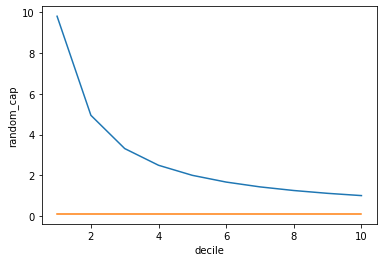

In [105]:
ax=sns.lineplot(x="decile",y="lift_over_random",data=sorted_reindexed)
ax=sns.lineplot(x="decile",y='random_cap',data=sorted_reindexed)

In [ ]:
# Since XGB account for maximum events till the first 3 deciles, it's the best out of all the trained models

#We can create numerous strategies based on the different groupings/deciles and employ different strategies for group of
# deciles to maintain and keep maximum number of possible clients, or minimize the loss in case of defaults
# Like may be tdemanding higher rate of interest for their capitals to top 3 deciles,

# For example, 
# A mortgage applicant with a superior credit rating and steady income is likely to be perceived as a low credit risk,
# they will receive a low-interest rate on their mortgage. In contrast, if an applicant has a poor credit history, 
# they may have to work with a subprime lender—a mortgage lender that offers loans with relatively high-interest rates 
# to high-risk borrowers—to obtain financing.

In [ ]:
# Project Conclusion :- 
# Create a decision tree and show it to stakeholders. This will create awareness about the kind of rules that a Tree might 
# come up with
# Now speak about the benefit of ensembles and how they achieve a higher degress of robustness than a single tree
# Now is the time to show that the ensemble is as good if not better than the decison tree
# This way you can first sell the idea of a tree based solution and then sell the final product which is an ensemble of the
# idea you have already sold(decision tree)